# Introduction to Implicit Time Integration - Linear Convection

In [12]:
# Basic modules and graphics settings
%matplotlib inline 
import numpy  
import math                     
from matplotlib import pyplot    
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

## Some basic explicit time integration

In [52]:
# Specifit modules
from lcon import BFDResidual      # Linear convection backward finite difference residual
#from timeint import explicitEuler # Time integration procedures

# Input parameters
nx = 101    # number of points in space
tt = 0.5    # total time of simulation
lx = 2.     # 1D domain length 
c  = 1      # wave speed
sigma = .5  # sigma <=1.0, the nearest to 1.0 the least numerical dissipation. (why?)

# Discretization
dx = lx/(nx-1)                 # grid interval size in space
x  = numpy.linspace(0.,lx,nx)  # spatial grid
dt = sigma*dx/c                
nt = int(math.floor(tt/dt))    # Computes the numper of time steps required to reach tt

# Initial condition
u = numpy.ones(nx) 
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)
u[numpy.intersect1d(lbound, ubound)] = 2

def explicitEuler(u, nt, dt, dx):

    # Inicializa os resultados com dimensoes nt X nx
    un = numpy.zeros( (nt,len(u)) )
    # Copia o u inicial em todas as linhas
    un[:,:] = u.copy()

    for t in range(1, nt):  
        Residual = BFDResidual(c, dx, u)
        un[t,1:] = u[1:] + dt*Residual # u_{n+1}
        un[t, 0] = u[ 0]    # C.C.
        un[t,-1] = u[-1]    # C.C
        u = un[t].copy()    # u_{n+1} -> u_n
        
    return un

un = explicitEuler(u, nt, dt, dx)



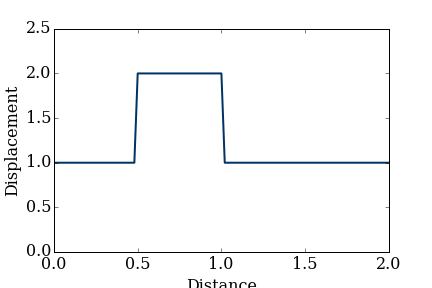
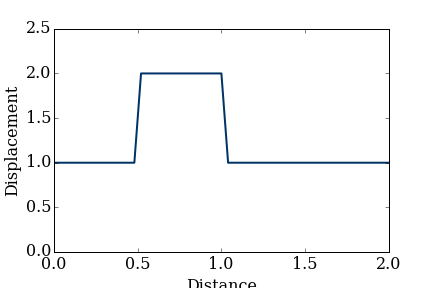
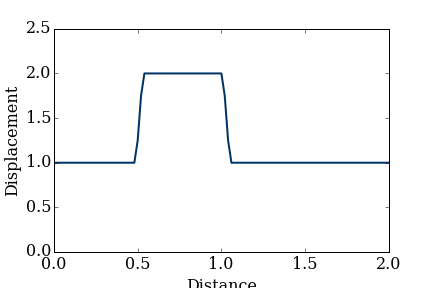
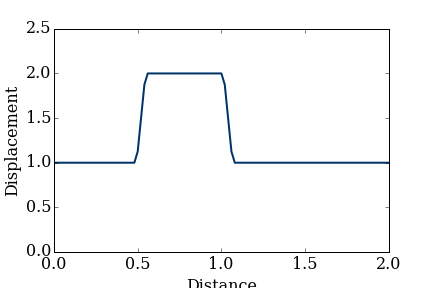
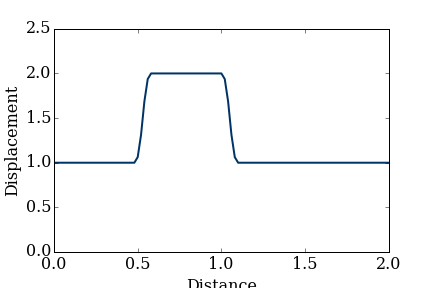
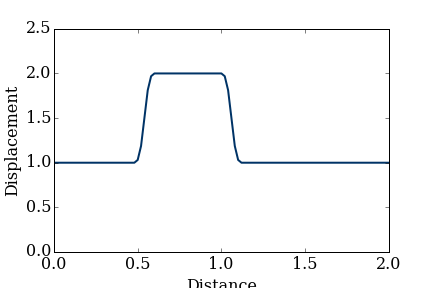
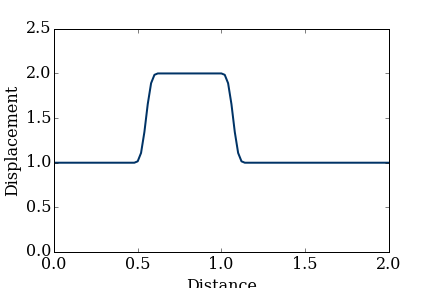
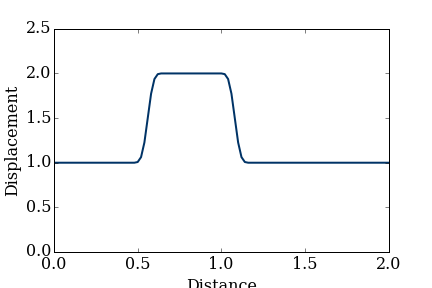
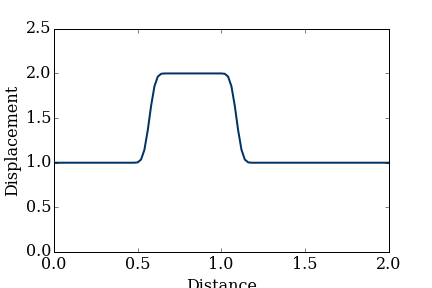
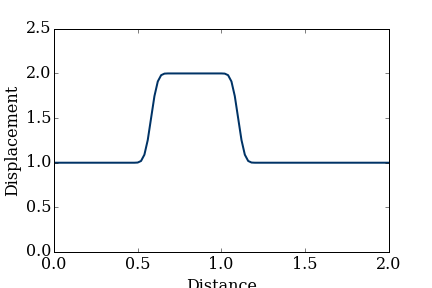
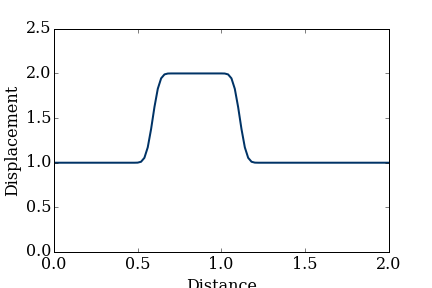
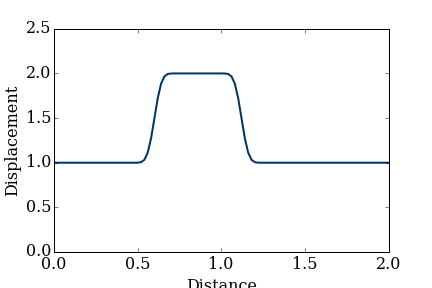
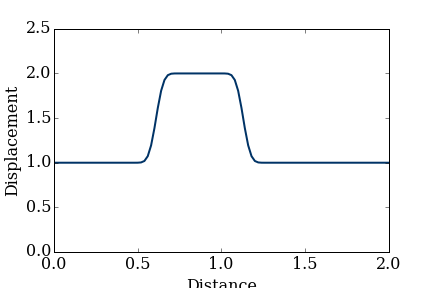
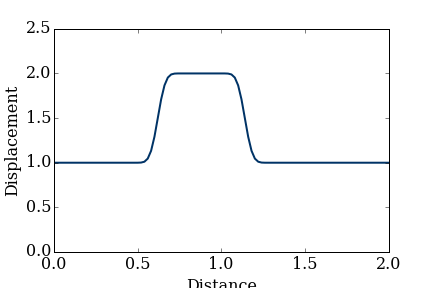
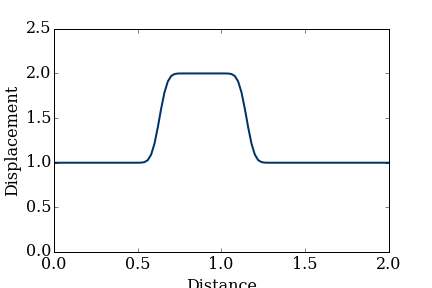
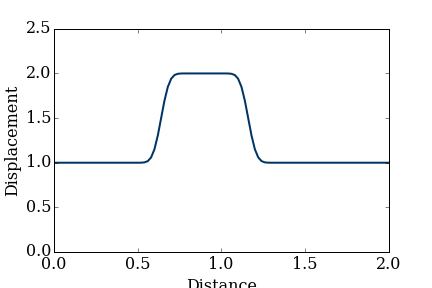
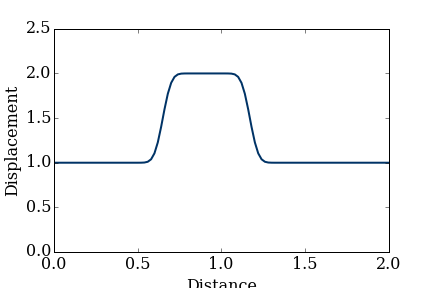
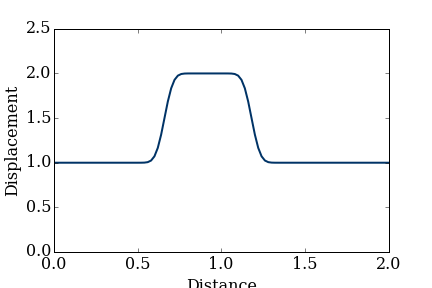
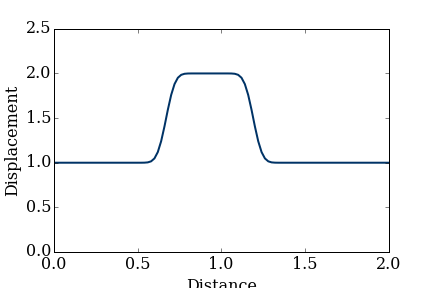
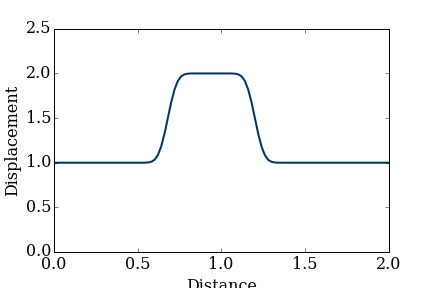
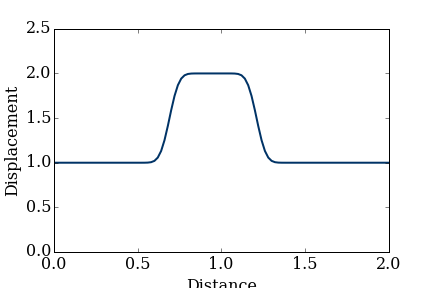
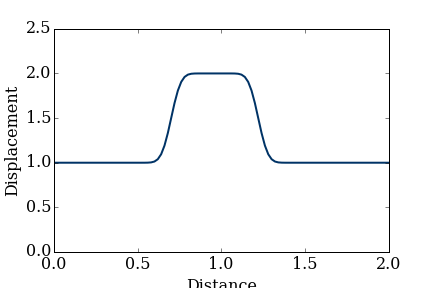
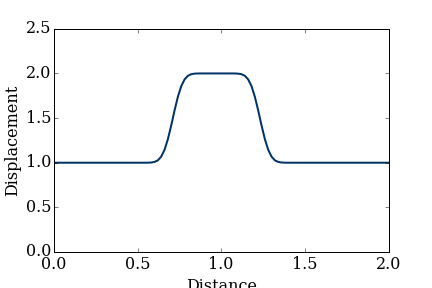
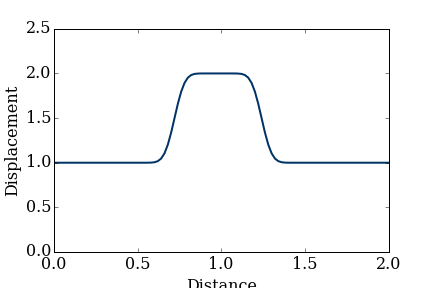
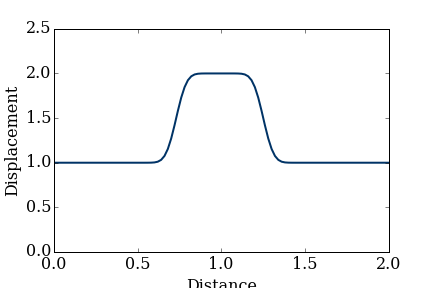
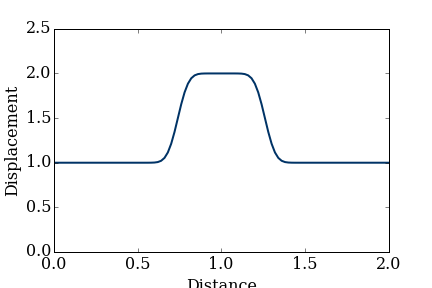
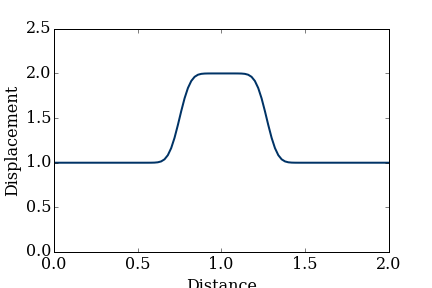
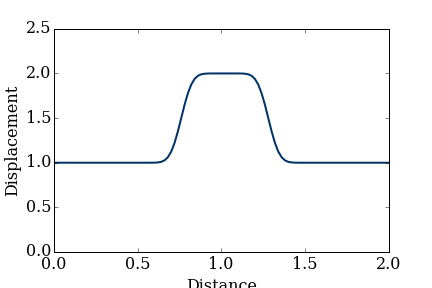
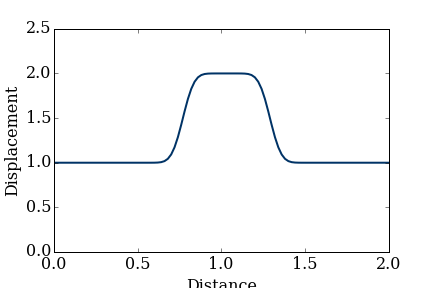
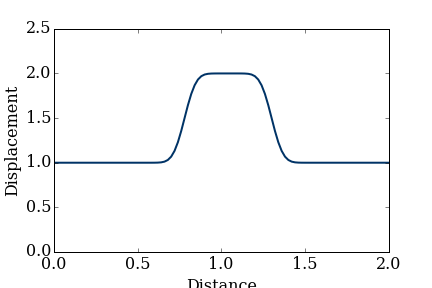
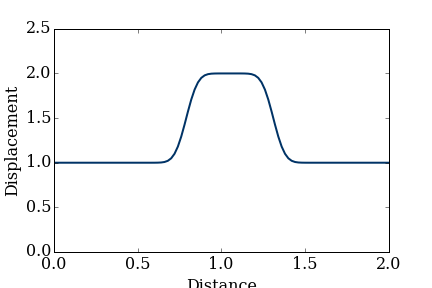
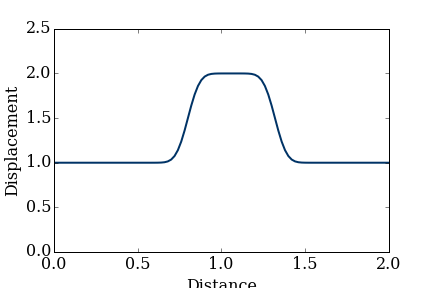
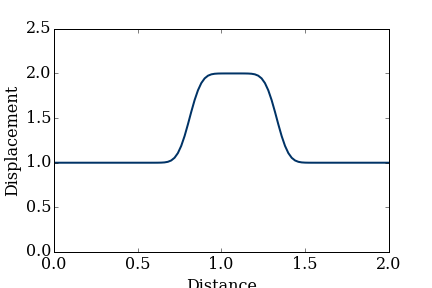
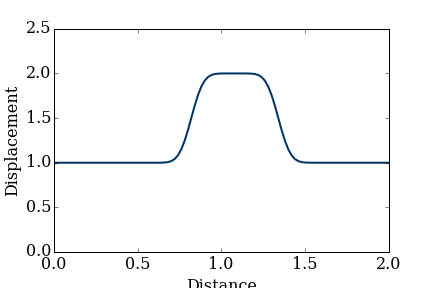
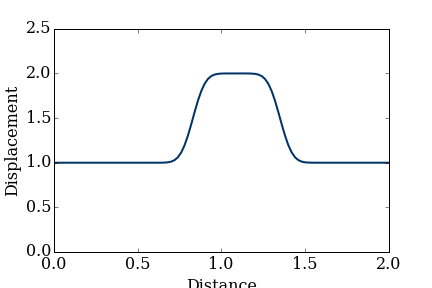
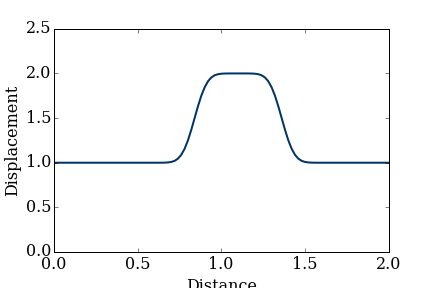
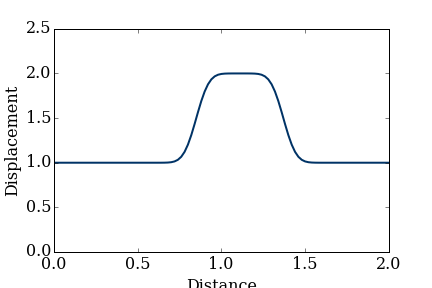
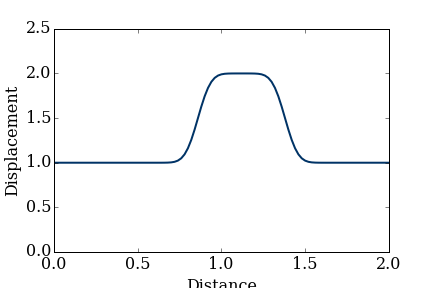
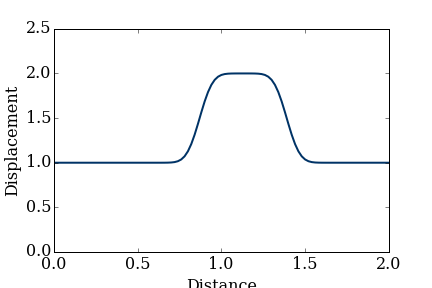
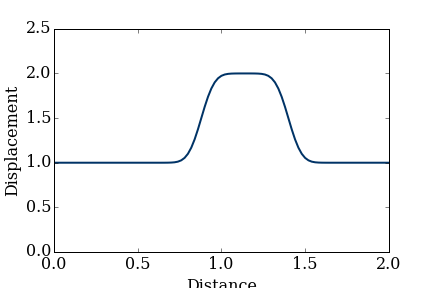
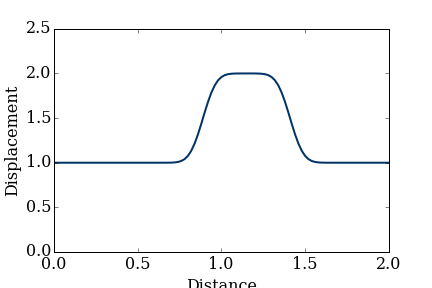
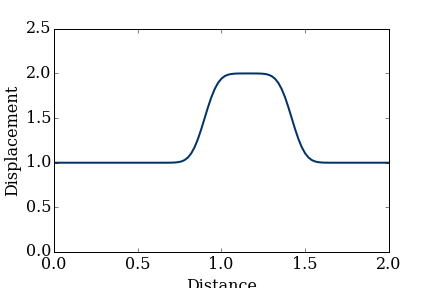
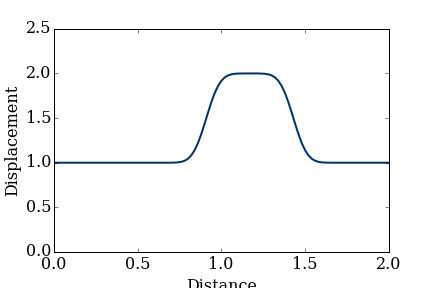
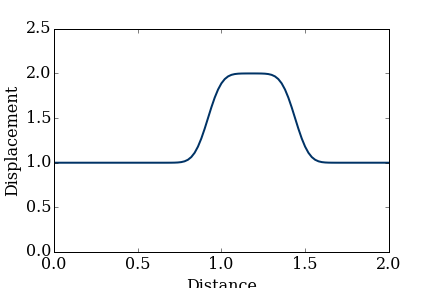
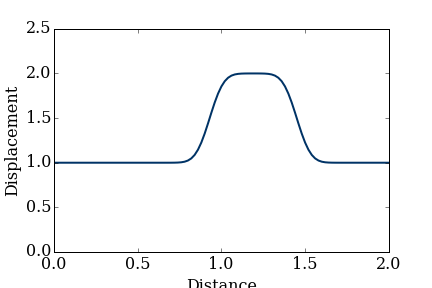
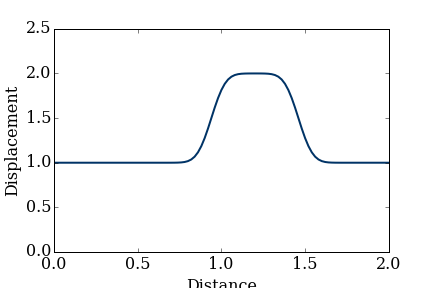
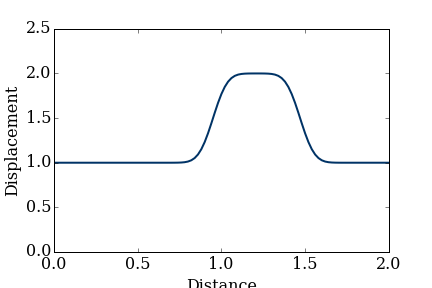
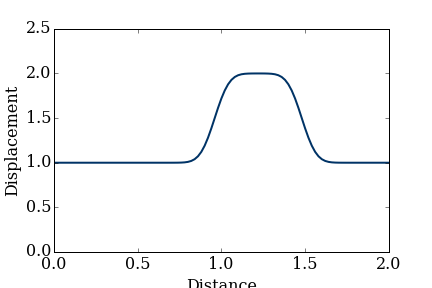
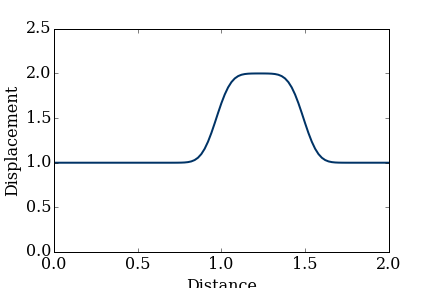
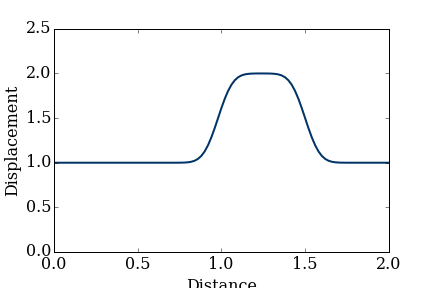

In [53]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,lx),ylim=(0,2.5),xlabel=('Distance'),ylabel=('Displacement'));
line, = ax.plot([],[],color='#003366', lw=2);

def animate(data):
    x = numpy.linspace(0,lx,nx)
    y = data
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')

## Backward Euler Implicit Time Integration

In [88]:
# Specifit modules
from lcon import BFDResidual
from lcon import DuBFDResidual

# Input parameters
nx = 101    # number of points in space
tt = 0.5    # total time of simulation
lx = 2.     # 1D domain length 
c  = 1      # wave speed
sigma = 1.5  # sigma <=1.0 for explicit

# Discretization
dx = lx/(nx-1)                 # grid interval size in space
x  = numpy.linspace(0.,lx,nx)  # spatial grid
dt = sigma*dx/c                
nt = int(math.floor(tt/dt))    # Computes the numper of time steps required to reach tt

# Initial condition
u = numpy.ones(nx) 
lbound = numpy.where(x >= 0.5)
ubound = numpy.where(x <= 1)
u[numpy.intersect1d(lbound, ubound)] = 2

def implicitEuler(u, nt, dt, dx):

    # Inicializa os resultados com dimensoes nt X nx
    un = numpy.zeros( (nt,len(u)) )
    # Copia o u inicial em todas as linhas
    un[:,:] = u.copy()
    # Delta_u
    du = numpy.zeros(len(u))

    for t in range(1, nt):  
        # Initial test
        Residual    = BFDResidual(c, dx, u)
        Du_Residual = DuBFDResidual(c, dx, u)                
        A = (1./dt)*numpy.eye(len(u)) - Du_Residual
        b = Residual
        du[1:-1] = numpy.linalg.solve( A[1:-1,1:-1],b[:-1] )
        err = numpy.linalg.norm(du[1:-1])
        u = u + du # for the linearized fully implicit, we stop here
        
        k = 0
        maxit = 5
        epsilon = 1.e-5
                
        while (err > epsilon) and (k < maxit):
            k = k+1
            Residual    = BFDResidual(c, dx, u)
            Du_Residual = DuBFDResidual(c, dx, u)                
            A = (1./dt)*numpy.eye(len(u)) - Du_Residual
            b = Residual - (1./dt)*(u[1:] - un[t-1,1:])             # b = Residual - (1./dt)*du[1:]
            du[1:-1] = numpy.linalg.solve( A[1:-1,1:-1],b[:-1] )
            err = numpy.linalg.norm(du[1:-1])
            u = u + du
            
        print("Time step = ", t," -> Number of LSS = ", k+1, " -> ||du|| = ", err)
        
        un[t,1:] = u[1:]    # u_{n+1}
        un[t, 0] = u[ 0]    # C.C.
        un[t,-1] = u[-1]    # C.C
        
    return un

un = implicitEuler(u, nt, dt, dx)


Time step =  1  -> Number of LSS =  2  -> ||du|| =  5.96302819937e-16
Time step =  2  -> Number of LSS =  2  -> ||du|| =  5.70420985689e-16
Time step =  3  -> Number of LSS =  2  -> ||du|| =  5.76983041935e-16
Time step =  4  -> Number of LSS =  2  -> ||du|| =  5.19123803552e-16
Time step =  5  -> Number of LSS =  2  -> ||du|| =  5.4321668077e-16
Time step =  6  -> Number of LSS =  2  -> ||du|| =  5.87645087408e-16
Time step =  7  -> Number of LSS =  2  -> ||du|| =  5.18167563644e-16
Time step =  8  -> Number of LSS =  2  -> ||du|| =  5.51429346505e-16
Time step =  9  -> Number of LSS =  2  -> ||du|| =  5.15358963344e-16
Time step =  10  -> Number of LSS =  2  -> ||du|| =  4.97789931516e-16
Time step =  11  -> Number of LSS =  2  -> ||du|| =  6.23660256436e-16
Time step =  12  -> Number of LSS =  2  -> ||du|| =  5.95600164209e-16
Time step =  13  -> Number of LSS =  2  -> ||du|| =  5.56267671139e-16
Time step =  14  -> Number of LSS =  2  -> ||du|| =  4.97162858015e-16
Time step =  15 


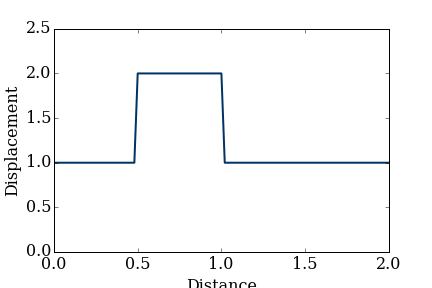
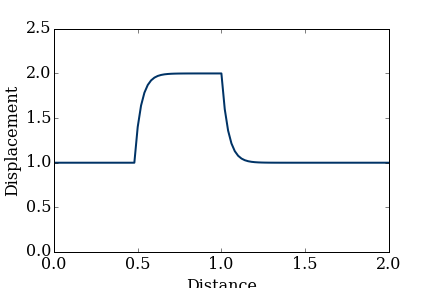
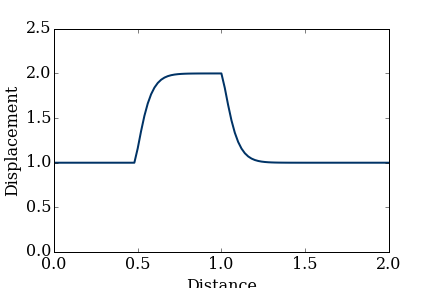
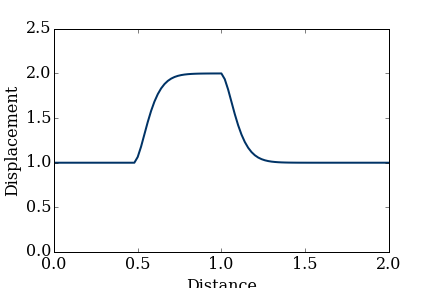
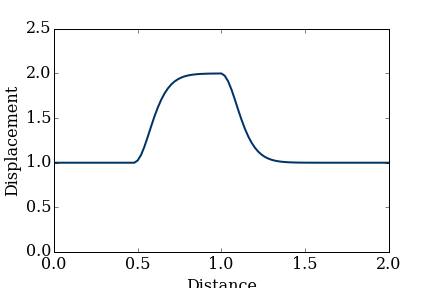
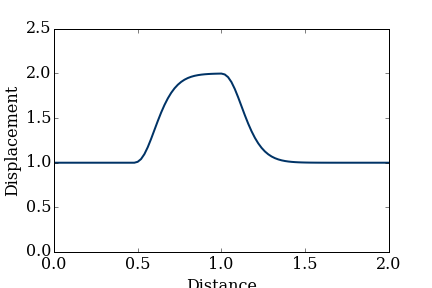
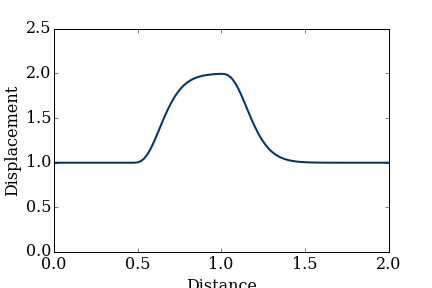
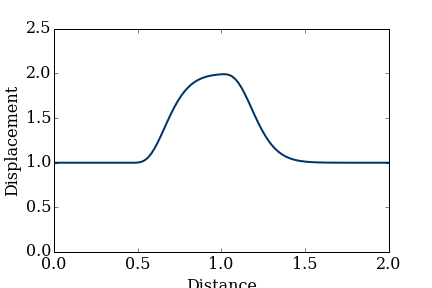
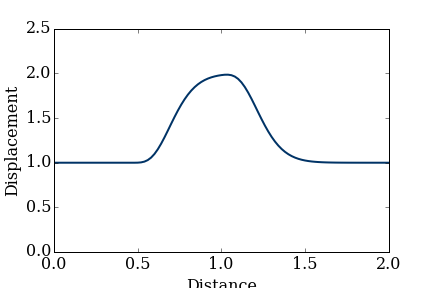
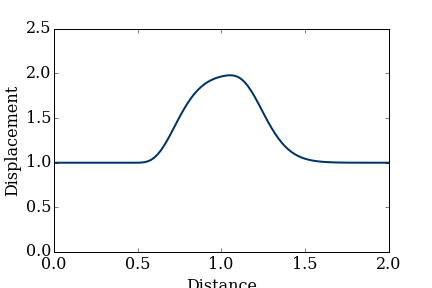
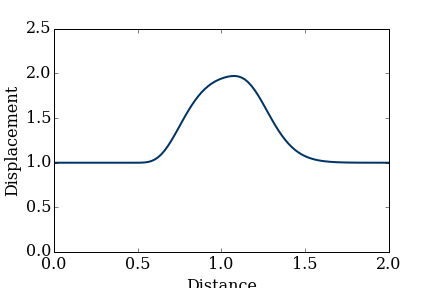
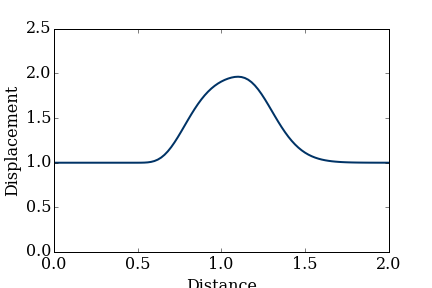
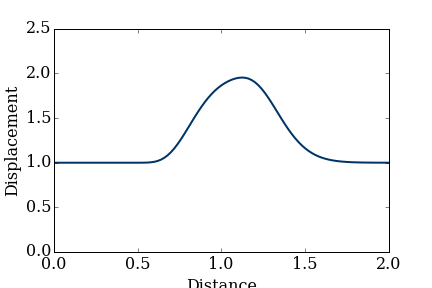
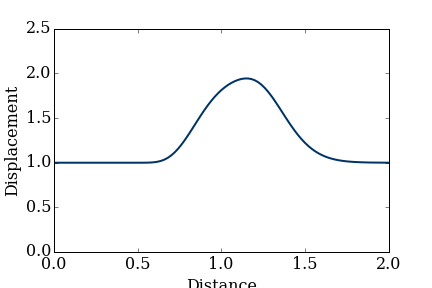
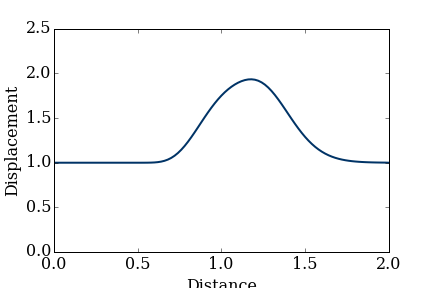
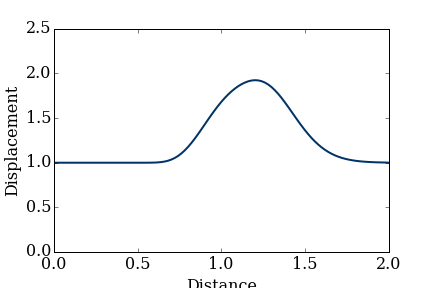

In [80]:
fig = pyplot.figure();
ax = pyplot.axes(xlim=(0,lx),ylim=(0,2.5),xlabel=('Distance'),ylabel=('Displacement'));
line, = ax.plot([],[],color='#003366', lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')